In [1]:
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as scores

import pomegranate

warnings.filterwarnings("ignore")
#%matplotlib inline

In [2]:
filename="caesarian.csv"


# data = arff.loadarff(r"caesarian.csv.arff")
# df = pd.DataFrame(data[0])
data = pd.read_csv(filename)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivey No         80 non-null     int64 
 2   Delivery No        80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [3]:
data.describe()

,Age,Delivey No
count,80.000000,80.000000
mean,27.687500,1.662500
std,5.017927,0.794662
min,17.000000,1.000000
25%,25.000000,1.000000
50%,27.000000,1.000000
75%,32.000000,2.000000
max,40.000000,4.000000


In [4]:
data.head(10)

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes
5,26,1,Premature,Low,apt,No
6,27,2,Timely,Normal,apt,No
7,32,3,Timely,Normal,apt,Yes
8,28,2,Timely,Normal,apt,No
9,27,1,Premature,Normal,apt,yes





#### From .info() method and below code, we can see that there are no null or missing values in the data set and since the data set is small consisting of about 80 rows, we will not be checking duplicate values

In [5]:
round(100 * (data.isnull().sum()/len(data)),2).sort_values(ascending=False)

Age                  0.0
Delivey No           0.0
Delivery No          0.0
Blood of Pressure    0.0
Heart Problem        0.0
Caesarian            0.0
dtype: float64

In [6]:
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :\n', categorical)

There are 4 categorical variables
The categorical variables are :
 ['Delivery No', 'Blood of Pressure', 'Heart Problem', 'Caesarian']


In [7]:
numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 2 numerical variables
The numerical variables are : ['Age', 'Delivey No']


In [8]:
for var in categorical:
    print(f"For categorical feature - {var}, value counts are :")
    print(data[var].value_counts())
    print()

For categorical feature - Delivery No, value counts are :
Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64

For categorical feature - Blood of Pressure, value counts are :
Normal    40
High      20
Low       19
low        1
Name: Blood of Pressure, dtype: int64

For categorical feature - Heart Problem, value counts are :
apt      50
inept    30
Name: Heart Problem, dtype: int64

For categorical feature - Caesarian, value counts are :
Yes    42
No     34
yes     4
Name: Caesarian, dtype: int64



In [9]:
for var in numerical:
    print(f"For numerical feature - {var}, value counts are :")
    print(data[var].value_counts())
    print()

For numerical feature - Age, value counts are :
26    10
32     8
25     7
27     7
29     6
28     6
33     5
22     4
20     3
30     3
31     3
36     3
24     2
21     2
18     2
19     2
35     2
38     1
37     1
17     1
23     1
40     1
Name: Age, dtype: int64

For numerical feature - Delivey No, value counts are :
1    41
2    27
3    10
4     2
Name: Delivey No, dtype: int64



In [10]:
data["Blood of Pressure"] = data["Blood of Pressure"].replace(to_replace="low",value="Low")
data["Caesarian"] = data["Caesarian"].replace(to_replace="yes",value="Yes")
data["Caesarian"].replace(to_replace=["Yes","No"],value=[1,0],inplace=True)

In [11]:
for var in categorical:
    print(f"For categorical feature - {var}, value counts are :")
    print(data[var].value_counts())
    print()

For categorical feature - Delivery No, value counts are :
Timely       46
Premature    17
Latecomer    17
Name: Delivery No, dtype: int64

For categorical feature - Blood of Pressure, value counts are :
Normal    40
High      20
Low       20
Name: Blood of Pressure, dtype: int64

For categorical feature - Heart Problem, value counts are :
apt      50
inept    30
Name: Heart Problem, dtype: int64

For categorical feature - Caesarian, value counts are :
1    46
0    34
Name: Caesarian, dtype: int64



In [12]:
#data.head(10)

In [13]:
dataset = pd.get_dummies(data)

In [14]:
dataset.head(10)

,Age,Delivey No,Caesarian,Delivery No_Latecomer,Delivery No_Premature,Delivery No_Timely,Blood of Pressure_High,Blood of Pressure_Low,Blood of Pressure_Normal,Heart Problem_apt,Heart Problem_inept
0,22,1,0,0,0,1,1,0,0,1,0
1,26,2,1,0,0,1,0,0,1,1,0
2,26,2,0,0,1,0,0,0,1,1,0
3,28,1,0,0,0,1,1,0,0,1,0
4,22,2,1,0,0,1,0,0,1,1,0
5,26,1,0,0,1,0,0,1,0,1,0
6,27,2,0,0,0,1,0,0,1,1,0
7,32,3,1,0,0,1,0,0,1,1,0
8,28,2,0,0,0,1,0,0,1,1,0
9,27,1,1,0,1,0,0,0,1,1,0


## Question 2: Decision Tree and Prolog

In [15]:
# Take care of categorical data using dummy variables

X = dataset.drop(['Caesarian'],axis=1)
y = dataset[['Caesarian']]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [33]:
classifier = DecisionTreeClassifier(criterion = 'gini', random_state=0, max_depth = 3)
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
score=scores(y_test,y_pred,average="weighted")
acc = classifier.score(X_test,y_test)
cm = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(acc)

print(report)

print(cm)

0.75
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.67      0.67      0.67         6

    accuracy                           0.75        16
   macro avg       0.73      0.73      0.73        16
weighted avg       0.75      0.75      0.75        16

[[8 2]
 [2 4]]


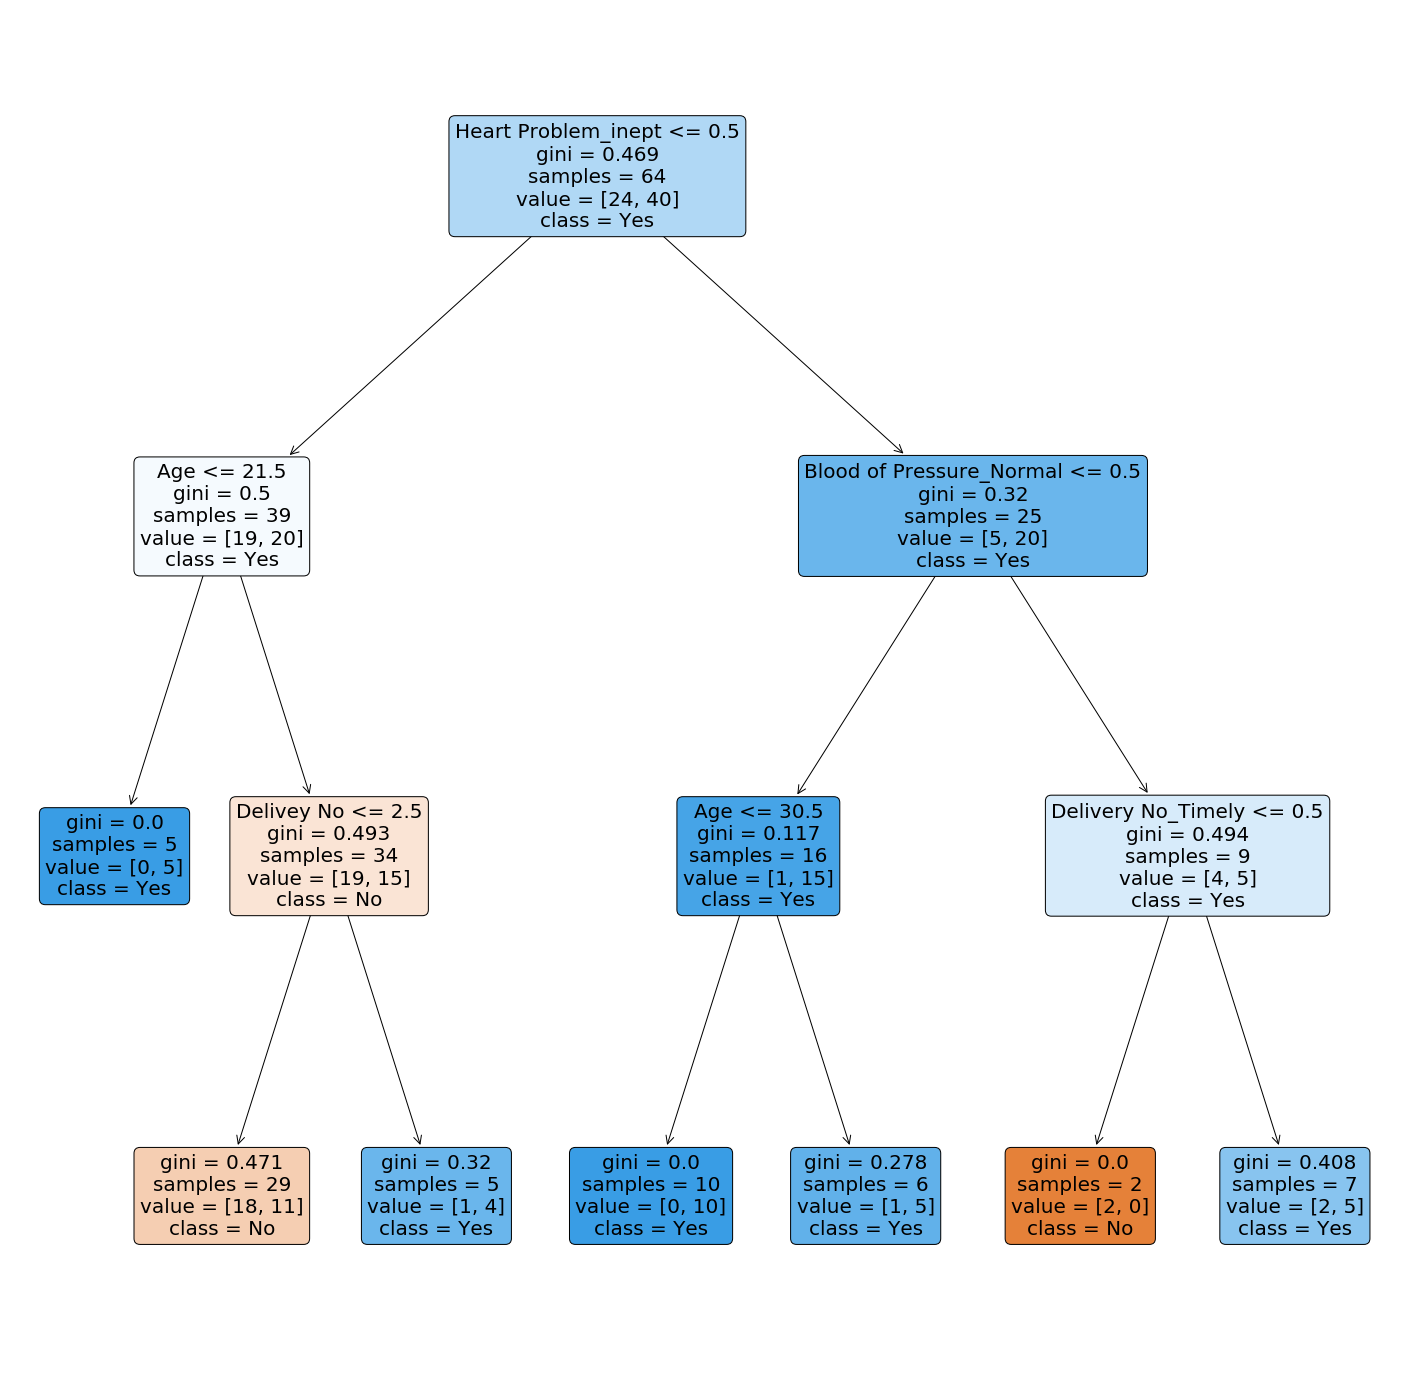

In [34]:
import pydotplus
from sklearn import tree
from sklearn. tree import export_graphviz
from IPython.display import Image

# dot_data= export_graphviz(classifier)
# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())
plt.figure(figsize=(25,25))  # set plot size (denoted in inches)
tree.plot_tree(classifier,feature_names = list(X.columns),filled=True,rounded=True,fontsize=20,class_names=["No","Yes"])
plt.show()

In [28]:
dotfile = open("dt.dot", 'w')
tree.export_graphviz(classifier, out_file=dotfile, feature_names=list(X.columns))
dotfile.close()

# can check decision tree created in http://webgraphviz.com/

In [35]:
features = list(dataset.columns)

In [31]:
import numpy as np
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] 
                    if i != _tree.TREE_UNDEFINED else "undefined!" 
                    for i in tree_.feature]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "    " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, np.argmax(tree_.value[node])))

    recurse(0, 1)

In [36]:
tree_to_code(classifier,features)

def tree(Age, Delivey No, Caesarian, Delivery No_Latecomer, Delivery No_Premature, Delivery No_Timely, Blood of Pressure_High, Blood of Pressure_Low, Blood of Pressure_Normal, Heart Problem_apt, Heart Problem_inept):
    if Heart Problem_apt <= 0.5:
        if Age <= 21.5:
            return 1
        else:  # if Age > 21.5
            if Delivey No <= 2.5:
                return 0
            else:  # if Delivey No > 2.5
                return 1
    else:  # if Heart Problem_apt > 0.5
        if Blood of Pressure_Low <= 0.5:
            if Age <= 30.5:
                return 1
            else:  # if Age > 30.5
                return 1
        else:  # if Blood of Pressure_Low > 0.5
            if Delivery No_Premature <= 0.5:
                return 0
            else:  # if Delivery No_Premature > 0.5
                return 1


In [37]:
data.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,0
1,26,2,Timely,Normal,apt,1
2,26,2,Premature,Normal,apt,0
3,28,1,Timely,High,apt,0
4,22,2,Timely,Normal,apt,1
